# Quantum optimization with neutral atoms applied to MIS

Let us make sure that you have the right versions of the python package for this project. Run the next command to make sure that everything is fine

In [65]:
!pip install pulser numpy networkx pasqal-cloud pandas geopy scikit-optimize emu_sv

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: pip install --upgrade pip


### Packages 

In [66]:
import numpy as np
import networkx as nx 
from itertools import product
import pandas as pd 
from geopy.distance import geodesic
import matplotlib.pyplot as plt


Example of a graph $G=(V, E)$

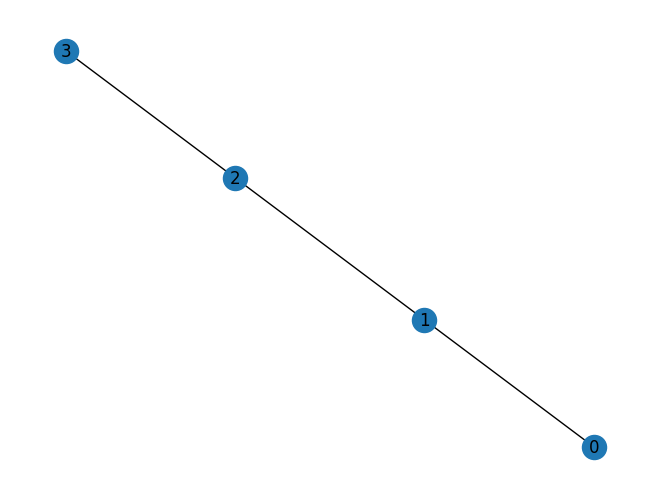

In [67]:
G=nx.path_graph(4)

nx.draw(G, with_labels=True)

A graph $G$ is usually represented by an adjacency matrix $A \in \{0;1\}^{|V| \times |V|} $ that encodes the connexion between each node:
$$\forall (i, j) \in |V|^2 : A(i, j)=\begin{cases} 1 & \text{ if } (i, j)\in E \\
0 & \text{ otherwise }
\end{cases}
$$


In [68]:
nx.adjacency_matrix(G).todense()

array([[0, 1, 0, 0],
       [1, 0, 1, 0],
       [0, 1, 0, 1],
       [0, 0, 1, 0]])

### First steps in Pulser

We will mostly use Pulser as the python package for neutral atom simulations. 

In [ ]:
from pulser import Pulse, Sequence, Register
from pulser.devices import MockDevice, AnalogDevice
from pulser import waveforms
import pulser as pl 
import matplotlib.pyplot as plt
import numpy as np

We first need to generate a register, i.e. a set of atom positions that are fixed through their coordinates for example. 

/Users/eliebermot/Library/Python/3.10/lib/python/site-packages/pulser/register/register.py:58: DeprecationWarning: Usage of `int`s or any non-`str`types as `QubitId`s will be deprecated. Define your `QubitId`s as `str`s, prefer setting `prefix='q'` when using classmethods, as that will become the new default once `int` qubit IDs become invalid.
  super().__init__(qubits, **kwargs)


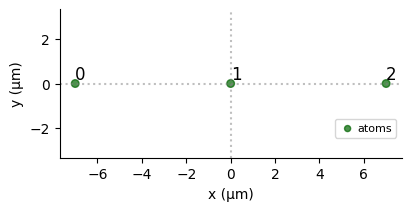

In [77]:
coords = [[-7, 0], [0,0], [7,0]]
reg = Register.from_coordinates(coords)
reg.draw()

Once generated, we then need to specify the operations i.e. the $(\Omega(t), \delta(t))$ that we apply to our neutral atoms, now mapped into a register.  This is what we call a schedule. 
We first need to specify the device (i.e. the quantum computer on which we are running our computations), the amplitude and the detuning 

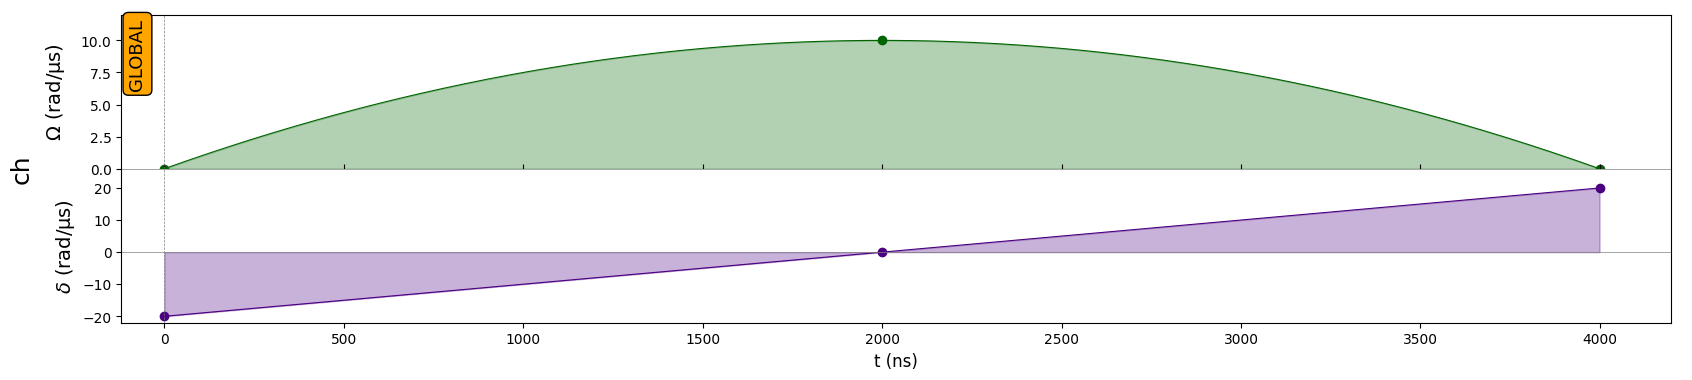

In [78]:
seq = Sequence(reg, MockDevice)

seq.declare_channel('ch', 'rydberg_global')

amplitude = waveforms.InterpolatedWaveform(4000, [0,10,0])
detuning = waveforms.InterpolatedWaveform(4000, [-20,0,20])
pulse = Pulse(amplitude, detuning, 0)

seq.add(pulse, 'ch')
seq.draw()

In [79]:
sim=pl.backends.QutipBackendV2(seq)
result = sim.run()

In [80]:
# a measurement of the final state will give the MIS of the graph with
# almost 100% probability
result.final_bitstrings

Counter({'101': 998, '001': 2})

## Pasqal cloud

Go to the website https://portal.pasqal.cloud/ and create an account and create a project-id (follow the step of https://docs.pasqal.com/cloud/set-up/)

In [ ]:
from pasqal_cloud import SDK
from pasqal_cloud.device import DeviceTypeName


sdk = SDK(
    username="your username",# Your username or email address for the Pasqal Cloud Platform
    project_id="your project-id" , # The ID of the project associated to your account 
    password="your password"  # The password for your Pasqal Cloud Platform account
)

